### Historical Analysis of the NYC Real Estate Market

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

bronx15_20 = pd.read_csv("C:\\Users\\13161\\OneDrive\\桌面\\PUI\\data\\bronx\\bronx15-20.csv")
Brooklyn15_20 = pd.read_csv("C:\\Users\\13161\\OneDrive\\桌面\\PUI\\data\\Brooklyn\\brooklyn15-20.csv")
Manhattan15_20 = pd.read_csv("C:\\Users\\13161\\OneDrive\\桌面\\PUI\\data\\Manhattan\\Manhattan15-20.csv")
queens15_20 = pd.read_csv("C:\\Users\\13161\\OneDrive\\桌面\\PUI\\data\\queens\\queens15-20.csv")
statenisland15_20 = pd.read_csv("C:\\Users\\13161\\OneDrive\\桌面\\PUI\\data\\statenisland\\statenisland15-20.csv")

D:\Anaconda\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
bronx15_20.columns = [col.replace('\n','').replace(' ','_') for col in bronx15_20.columns]

In [3]:
bronx15_20.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,2,HUNTS POINT,30 WAREHOUSES,4,2781,500,NaN,E9,"355 FOOD CENTER DRIVE, B-22",NaN,...,0,10,10,5799632,1598812.0,1973.0,4,E9,350000,2020/7/28
1,2,HUNTS POINT,30 WAREHOUSES,4,2781,500,NaN,E9,"355 FOOD CENTER DRIVE, C17",NaN,...,0,10,10,6777433,1598812.0,1973.0,4,E9,3850000,2020/3/2
2,2,HUNTS POINT,30 WAREHOUSES,4,2781,500,NaN,E9,"355 FOOD CENTER DRIVE, C18",NaN,...,0,10,10,6777433,1598812.0,1973.0,4,E9,3850000,2020/3/2
3,2,HUNTS POINT,30 WAREHOUSES,4,2781,500,NaN,E9,"355 FOOD CENTER DRIVE, C19",NaN,...,0,10,10,6777433,1598812.0,1973.0,4,E9,3850000,2020/3/2
4,2,HUNTS POINT,30 WAREHOUSES,4,2781,500,NaN,E9,"355 FOOD CENTER DRIVE, C20",NaN,...,0,10,10,6777433,1598812.0,1973.0,4,E9,3850000,2020/3/2


In [4]:
bronx15_20 = bronx15_20.loc[(bronx15_20['ZIP_CODE'] > 0) & (bronx15_20['GROSS_SQUARE_FEET'] > 300)]
bronx15_20 = bronx15_20.loc[(bronx15_20['YEAR_BUILT'] >= 1850)& (bronx15_20['SALE_PRICE'] >=1800)& (bronx15_20['GROSS_SQUARE_FEET'] <1e4)
                            & (bronx15_20['SALE_PRICE'] >= 1e4) & (bronx15_20['SALE_PRICE'] <= 3e6) & (bronx15_20['RESIDENTIAL_UNITS']!='0')]
bronx15_20['SALE_DATE'] = pd.to_datetime(bronx15_20['SALE_DATE'])
bronx15_20['price_per_feet']= bronx15_20['SALE_PRICE']/bronx15_20['GROSS_SQUARE_FEET']
bronx15_20 = bronx15_20.set_index('SALE_DATE')
bronx15_20_sales =bronx15_20['price_per_feet'].resample('M').mean()

In [5]:
bronx15_20_sales

SALE_DATE
2015-01-31    203.096811
2015-02-28    194.269742
2015-03-31    183.089871
2015-04-30    192.121309
2015-05-31    195.273460
                 ...    
2020-08-31    312.908108
2020-09-30    319.514315
2020-10-31    310.420535
2020-11-30    319.469064
2020-12-31    322.385112
Freq: M, Name: price_per_feet, Length: 72, dtype: float64

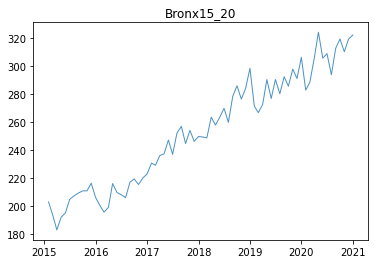

In [6]:
ax = plt.subplot()
ax.ticklabel_format(style='plain')
ax.set_title('Bronx15_20')
ax.plot(bronx15_20_sales, alpha=0.8, linewidth=1)

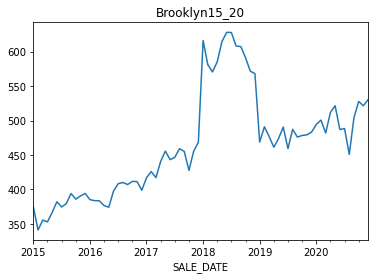

In [7]:
for i in [Brooklyn15_20]:
    i.columns = [col.replace('\n','').replace(' ','_') for col in i.columns]
    i = i.loc[(i['ZIP_CODE'] > 0) & (i['GROSS_SQUARE_FEET'] > 300)]
    i = i.loc[(i['YEAR_BUILT'] >= 1850)& (i['GROSS_SQUARE_FEET'] <1e4)
              & (i['SALE_PRICE'] >= 1e4) & (i['SALE_PRICE'] <= 3e6) & (i['RESIDENTIAL_UNITS']!='0')]
    i['SALE_DATE'] = pd.to_datetime(i['SALE_DATE'])
    i['price_per_feet']= i['SALE_PRICE']/i['GROSS_SQUARE_FEET']
    i = i.set_index('SALE_DATE')
    sales = i['price_per_feet'].resample('M').mean()
    fig, ax = plt.subplots() #get axis to plot on
    sales.plot(ax=ax,kind='line').set_title('Brooklyn15_20')


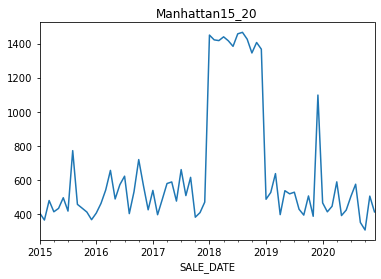

In [8]:
for i in [Manhattan15_20]:
    i.columns = [col.replace('\n','').replace(' ','_') for col in i.columns]
    i = i.loc[(i['ZIP_CODE'] > 0) & (i['GROSS_SQUARE_FEET'] > 300) ]
    i = i.loc[(i['YEAR_BUILT'] >= 1850)& (i['GROSS_SQUARE_FEET'] <1e4)
              & (i['SALE_PRICE'] >= 1e4) & (i['SALE_PRICE'] <= 3e6) & (i['RESIDENTIAL_UNITS']!='0')]
    i['SALE_DATE'] = pd.to_datetime(i['SALE_DATE'])
    i['price_per_feet']= i['SALE_PRICE']/i['GROSS_SQUARE_FEET']
    i = i.set_index('SALE_DATE')
    sales = i['price_per_feet'].resample('M').mean()
    fig, ax = plt.subplots() #get axis to plot on
    sales.plot(ax=ax,kind='line').set_title('Manhattan15_20')


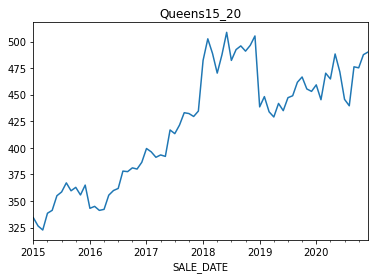

In [9]:
for i in [queens15_20]:
    i.columns = [col.replace('\n','').replace(' ','_') for col in i.columns]
    i = i.loc[(i['ZIP_CODE'] > 0) & (i['GROSS_SQUARE_FEET'] > 300)]
    i = i.loc[(i['YEAR_BUILT'] >= 1850)& (i['GROSS_SQUARE_FEET'] <1e4)
              & (i['SALE_PRICE'] >= 1e4) & (i['SALE_PRICE'] <= 3e6) & (i['RESIDENTIAL_UNITS']!='0')]
    i['SALE_DATE'] = pd.to_datetime(i['SALE_DATE'])
    i['price_per_feet']= i['SALE_PRICE']/i['GROSS_SQUARE_FEET']
    i = i.set_index('SALE_DATE')
    sales = i['price_per_feet'].resample('M').mean()
    fig, ax = plt.subplots() #get axis to plot on
    sales.plot(ax=ax,kind='line').set_title('Queens15_20')

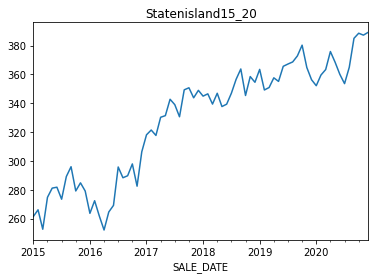

In [10]:
for i in [statenisland15_20]:
    i.columns = [col.replace('\n','').replace(' ','_') for col in i.columns]
    i = i.loc[(i['ZIP_CODE'] > 0) & (i['GROSS_SQUARE_FEET'] > 300)]
    i = i.loc[(i['YEAR_BUILT'] >= 1850)& (i['GROSS_SQUARE_FEET'] <1e4)
              & (i['SALE_PRICE'] >= 1e4) & (i['SALE_PRICE'] <= 3e6) & (i['RESIDENTIAL_UNITS']!='0')]
    i['SALE_DATE'] = pd.to_datetime(i['SALE_DATE'])
    i['price_per_feet']= i['SALE_PRICE']/i['GROSS_SQUARE_FEET']
    i = i.set_index('SALE_DATE')
    sales = i['price_per_feet'].resample('M').mean()
    fig, ax = plt.subplots() #get axis to plot on
    sales.plot(ax=ax,kind='line').set_title('Statenisland15_20')

In [11]:
bronx15_20_sales.values

array([203.09681073, 194.26974193, 183.08987058, 192.12130946,
       195.27345972, 204.93019342, 207.4160202 , 209.44584876,
       210.9719967 , 211.01622105, 216.48502857, 206.3110845 ,
       200.49554842, 195.78703896, 199.23081843, 216.23642693,
       209.82110201, 208.21737114, 206.17488026, 217.1909082 ,
       219.50028248, 215.54551011, 220.1345881 , 223.12841506,
       230.82543163, 229.27988011, 236.2195719 , 237.42874701,
       247.31905323, 237.11457865, 252.38242707, 257.07230417,
       244.76058137, 254.2517969 , 246.37140221, 249.8360398 ,
       249.48165957, 248.87777754, 263.65763582, 258.02205273,
       263.71976661, 269.99840366, 259.95998201, 278.54751847,
       286.10186287, 276.5649886 , 284.17509573, 298.62313936,
       271.48585048, 266.90603064, 272.66536059, 290.52553128,
       277.02987892, 290.5887924 , 280.37758203, 292.5689232 ,
       285.74555651, 298.03276331, 291.27923399, 306.43569763,
       283.01393934, 288.54811339, 305.42939981, 324.34

## Data from 2015 to 2020


In [12]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import geopandas as gpd

In [14]:
bronx15_20 = pd.read_csv("C:\\Users\\13161\\OneDrive\\桌面\\PUI\\data\\bronx\\bronx15-20.csv")
Brooklyn15_20 = pd.read_csv("C:\\Users\\13161\\OneDrive\\桌面\\PUI\\data\\Brooklyn\\brooklyn15-20.csv")
Manhattan15_20 = pd.read_csv("C:\\Users\\13161\\OneDrive\\桌面\\PUI\\data\\Manhattan\\Manhattan15-20.csv")
queens15_20 = pd.read_csv("C:\\Users\\13161\\OneDrive\\桌面\\PUI\\data\\queens\\queens15-20.csv")
statenisland15_20 = pd.read_csv("C:\\Users\\13161\\OneDrive\\桌面\\PUI\\data\\statenisland\\statenisland15-20.csv")

D:\Anaconda\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
df = pd.DataFrame(columns=[], index = bronx15_20.index )
for i in [bronx15_20, Brooklyn15_20, Manhattan15_20, queens15_20, statenisland15_20]:
    i.columns = [col.replace('\n','').replace(' ','_') for col in i.columns]
    i = i.loc[(i['ZIP_CODE'] > 0) & (i['GROSS_SQUARE_FEET'] > 300)]
    i = i.loc[(i['YEAR_BUILT'] >= 1850)& (i['GROSS_SQUARE_FEET'] <1e4)
              & (i['SALE_PRICE'] >= 1e4) & (i['SALE_PRICE'] <= 3e6) & (i['RESIDENTIAL_UNITS']!='0')]
    i['SALE_DATE'] = pd.to_datetime(i['SALE_DATE'])
    i['price_per_feet']= i['SALE_PRICE']/i['GROSS_SQUARE_FEET']
    i = i.set_index('SALE_DATE')
    df = df.append(i)

In [16]:
df['YEAR_BUILT'] = pd.to_numeric(df['YEAR_BUILT'], errors='coerce', downcast=None)
df['RESIDENTIAL_UNITS'] = pd.to_numeric(df['RESIDENTIAL_UNITS'], errors='coerce', downcast=None)
df['COMMERCIAL_UNITS'] = pd.to_numeric(df['COMMERCIAL_UNITS'], errors='coerce', downcast=None)
df['LAND_SQUARE_FEET'] = pd.to_numeric(df['LAND_SQUARE_FEET'], errors='coerce', downcast=None)
df = df.dropna(axis=0,how='all')
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,price_per_feet
2016-03-01 00:00:00,2.0,HUNTS POINT,07 RENTALS - WALKUP APARTMENTS,2,2765.0,290.0,,C7,620 MANIDA STREET,,...,9.0,5.0,14,4500.0,9936.0,1920.0,2.0,C7,2344186.0,235.928543
2015-07-09 00:00:00,2.0,MORRISANIA/LONGWOOD,07 RENTALS - WALKUP APARTMENTS,2,2719.0,38.0,,C7,1120 FOX STREET,,...,11.0,2.0,13,3300.0,9920.0,1907.0,2.0,C7,1500000.0,151.209677
2018-11-07 00:00:00,2.0,MORRISANIA/LONGWOOD,07 RENTALS - WALKUP APARTMENTS,2,2719.0,38.0,NaN,C7,1120 FOX STREET,NaN,...,11.0,2.0,13,3300.0,9920.0,1907.0,2.0,C7,2100000.0,211.693548
2017-11-15 00:00:00,2.0,RIVERDALE,07 RENTALS - WALKUP APARTMENTS,2B,5716.0,264.0,,C1,2395 PALISADE AVENUE,,...,7.0,0.0,7,6500.0,9876.0,1924.0,2.0,C1,2575000.0,260.733090
2018-01-25 00:00:00,2.0,HIGHBRIDGE/MORRIS HEIGHTS,07 RENTALS - WALKUP APARTMENTS,2B,2523.0,166.0,NaN,C1,983 SUMMIT AVENUE,NaN,...,9.0,0.0,9,2870.0,9875.0,1905.0,2.0,C1,1635000.0,165.569620


## Price Distribution Map in 2020

In [17]:
df20 = df[df.index >= datetime.datetime.strptime('20200101', '%Y%m%d').date()]

D:\Anaconda\envs\geo_env\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [18]:
df20_ZIP = df20.groupby(['ZIP_CODE']).agg({'price_per_feet':'mean'})

In [19]:
zips = gpd.read_file("C:\\Users\\13161\\OneDrive\\桌面\\PUI\\zip\\ZIP_CODE_040114.shp")
zips['ZIPCODE'] = pd.to_numeric(zips['ZIPCODE'], errors='coerce', downcast=None)

In [20]:
price_viz = zips.merge(df20_ZIP,left_on='ZIPCODE',right_on='ZIP_CODE')

Text(0.5, 1.0, '2020 Price Distribution')

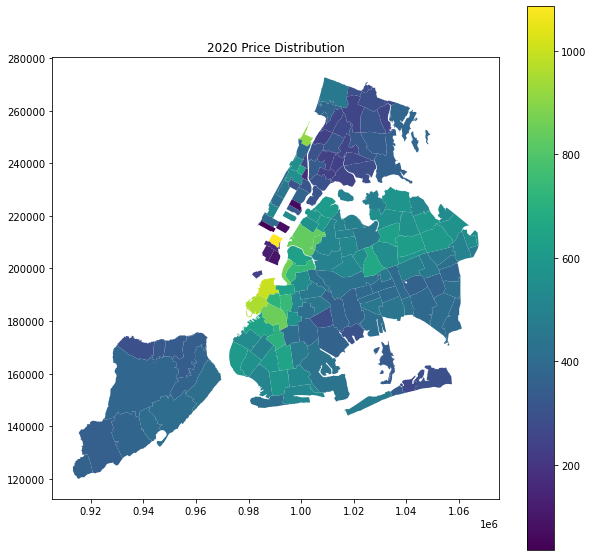

In [30]:
price_viz.plot(figsize = (10,10), column='price_per_feet', legend=True).set_title('2020 Price Distribution')

## Linear Regression

In [22]:
# 相关性矩阵
df[['YEAR_BUILT','RESIDENTIAL_UNITS','COMMERCIAL_UNITS','GROSS_SQUARE_FEET','LAND_SQUARE_FEET','price_per_feet']].corr()

,YEAR_BUILT,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,GROSS_SQUARE_FEET,LAND_SQUARE_FEET,price_per_feet
YEAR_BUILT,1.000000,-0.151083,-0.003534,-0.072961,0.083160,0.069052
RESIDENTIAL_UNITS,-0.151083,1.000000,-0.005188,0.602349,-0.050709,-0.179673
COMMERCIAL_UNITS,-0.003534,-0.005188,1.000000,0.027027,-0.000017,-0.004719
GROSS_SQUARE_FEET,-0.072961,0.602349,0.027027,1.000000,-0.032818,-0.306655
LAND_SQUARE_FEET,0.083160,-0.050709,-0.000017,-0.032818,1.000000,0.053038
price_per_feet,0.069052,-0.179673,-0.004719,-0.306655,0.053038,1.000000


In [23]:
df = df.loc[(df['price_per_feet'] >= 10)& (df['price_per_feet'] <3000)]
df = df.loc[(df['RESIDENTIAL_UNITS'] > 0)& (df['RESIDENTIAL_UNITS'] <100)]
df = df.loc[(df['COMMERCIAL_UNITS'] > 0)& (df['COMMERCIAL_UNITS'] <100)]
df = df.loc[(df['LAND_SQUARE_FEET'] > 300)& (df['LAND_SQUARE_FEET'] <3e6)]

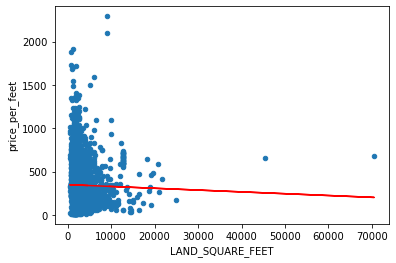

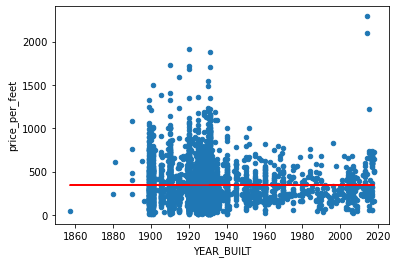

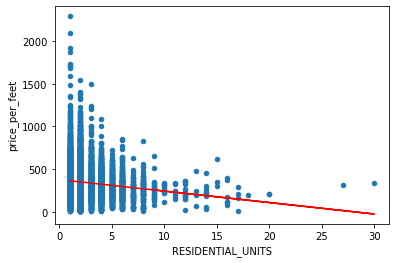

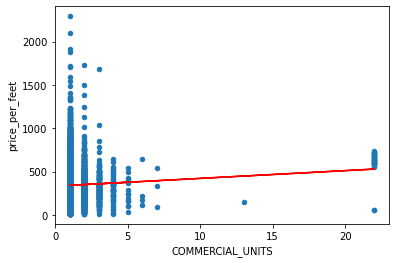

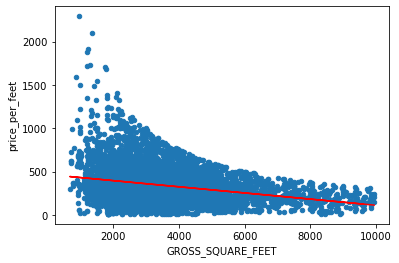

In [24]:
# 不同因子对price_per_feet回归
slope = []
intercept = []
R2 = []
for i in ['LAND_SQUARE_FEET','YEAR_BUILT','RESIDENTIAL_UNITS','COMMERCIAL_UNITS','GROSS_SQUARE_FEET']:
    lm_sk = LinearRegression(fit_intercept=True).fit(df[[i]], df['price_per_feet'])
    slope.append(lm_sk.coef_)
    intercept.append(lm_sk.intercept_)
    lm_smf = smf.ols(formula='price_per_feet~'+ i, data = df).fit()
    R2.append(lm_smf.rsquared)
    df['predicted_price']=lm_smf.predict()
    fig, ax = plt.subplots() #get axis to plot on
    df.plot(ax=ax,kind='scatter',x= i, y='price_per_feet') #show the data
    ax.plot(df[i],df['predicted_price'],'r-'); #show the regression line

In [25]:
result = pd.DataFrame(columns=['slope','intercept', 'R2'], index = ['LAND_SQUARE_FEET','YEAR_BUILT','RESIDENTIAL_UNITS','COMMERCIAL_UNITS','GROSS_SQUARE_FEET'])

result ['slope'] = slope
result ['intercept'] = intercept
result ['R2'] = R2
result 

,slope,intercept,R2
LAND_SQUARE_FEET,[-0.0020892018224457215],348.903290,4.483370e-04
YEAR_BUILT,[0.0031002350014904746],337.646192,9.918971e-08
RESIDENTIAL_UNITS,[-13.434530275907097],376.940813,1.522366e-02
COMMERCIAL_UNITS,[8.942979073854502],331.809680,4.932410e-03
GROSS_SQUARE_FEET,[-0.03560443478261494],466.654987,7.208530e-02


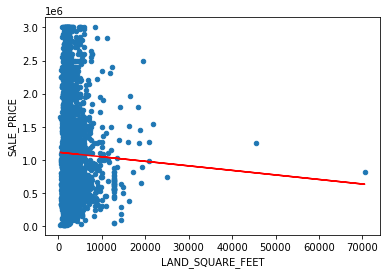

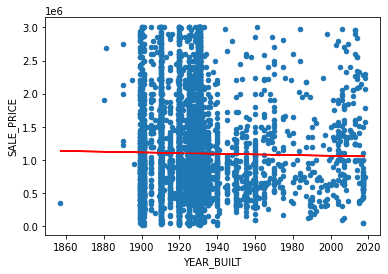

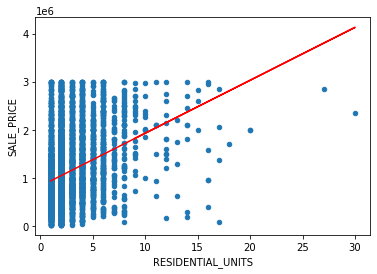

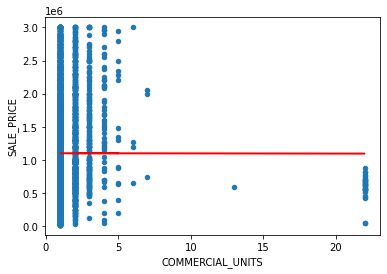

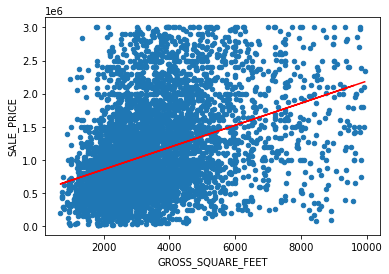

In [26]:
# 对price_per_feet回归效果不太好，现在对SALE_PRICE回归
slope = []
intercept = []
R2 = []
for i in ['LAND_SQUARE_FEET','YEAR_BUILT','RESIDENTIAL_UNITS','COMMERCIAL_UNITS','GROSS_SQUARE_FEET']:
    lm_sk = LinearRegression(fit_intercept=True).fit(df[[i]], df['SALE_PRICE'])
    slope.append(lm_sk.coef_)
    intercept.append(lm_sk.intercept_)
    lm_smf = smf.ols(formula='SALE_PRICE~'+ i, data = df).fit()
    R2.append(lm_smf.rsquared)
    df['predicted_price']=lm_smf.predict()
    fig, ax = plt.subplots() #get axis to plot on
    df.plot(ax=ax,kind='scatter',x= i, y='SALE_PRICE') #show the data
    ax.plot(df[i],df['predicted_price'],'r-'); #show the regression line

In [27]:
result = pd.DataFrame(columns=['slope','intercept', 'R2'], index = ['LAND_SQUARE_FEET','YEAR_BUILT','RESIDENTIAL_UNITS','COMMERCIAL_UNITS','GROSS_SQUARE_FEET'])

result ['slope'] = slope
result ['intercept'] = intercept
result ['R2'] = R2
result 

,slope,intercept,R2
LAND_SQUARE_FEET,[-6.842169234111258],1.117319e+06,4.724109e-04
YEAR_BUILT,[-510.2102427200088],2.084395e+06,2.639151e-04
RESIDENTIAL_UNITS,[110066.3410117463],8.271115e+05,1.003857e-01
COMMERCIAL_UNITS,[-132.179755899341],1.100215e+06,1.058554e-07
GROSS_SQUARE_FEET,[166.46106794318263],5.248514e+05,1.547934e-01


In [28]:
# Multi-variate regression
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+COMMERCIAL_UNITS', data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     544.9
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          4.75e-218
Time:                        19:47:18   Log-Likelihood:                -87755.
No. Observations:                5954   AIC:                         1.755e+05
Df Residuals:                    5951   BIC:                         1.755e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.244e+05   2.02e+0